# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [434]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [435]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban
5,South Latoya,3/11/19 12:26,9.52,1.995000e+12,10,Urban
6,New Paulville,2/27/19 11:17,43.25,7.932080e+11,44,Urban
7,Simpsonburgh,4/26/19 0:43,35.98,1.119540e+11,21,Urban
8,South Karenland,1/8/19 3:28,35.09,7.995620e+12,4,Urban
9,North Jasmine,3/9/19 6:26,42.81,5.327640e+12,33,Urban


## Deliverable 1: Get a Summary DataFrame 

In [436]:
#  1. Get the total rides for each city type
total_rides_by_city = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_city

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [437]:
# 2. Get the total drivers for each city type
total_drivers_by_city = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_city

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [438]:
#  3. Get the total amount of fares for each city type
total_fare_by_city = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fare_by_city

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [439]:
#  4. Get the average fare per ride for each city type. 
Avg_fare_per_ride = total_fare_by_city / total_rides_by_city
Avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [440]:
# 5. Get the average fare per driver for each city type. 
Avg_fare_per_driver = total_fare_by_city / total_drivers_by_city
Avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [441]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame ({
    "Total Rides": total_rides_by_city,
    "Total Drivers": total_drivers_by_city,
    "Total Fares": total_fare_by_city,
    "Average Fare per Ride": Avg_fare_per_ride,
    "Average Fare per Driver": Avg_fare_per_driver})

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [442]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df.dtypes

Total Rides                  int64
Total Drivers                int64
Total Fares                float64
Average Fare per Ride      float64
Average Fare per Driver    float64
dtype: object

In [443]:
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].astype(float)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].astype(float)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].astype(float)


In [444]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,.0f}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,.0f}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [445]:
import datetime as dt
pyber_data_df["date"]= pd.to_datetime(pyber_data_df["date"], format='%m/%d/%y %H:%M')


In [446]:
# 9. Using groupby() on the pyber_data_df to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
type_time_data_df = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
type_time_data_df.head()

fare
type  date                      
Rural 2019-01-01 09:45:00  43.69
      2019-01-02 11:18:00  52.12
      2019-01-03 19:51:00  19.90
      2019-01-04 03:31:00  24.88
      2019-01-06 07:38:00  47.33

In [447]:
# 10. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
type_time_data_df = type_time_data_df.reset_index()
type_time_data_df.head()

,type,date,fare
0,Rural,2019-01-01 09:45:00,43.69
1,Rural,2019-01-02 11:18:00,52.12
2,Rural,2019-01-03 19:51:00,19.90
3,Rural,2019-01-04 03:31:00,24.88
4,Rural,2019-01-06 07:38:00,47.33


In [448]:
# 11. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
type_time_data_pivot = type_time_data_df.pivot(index="date", columns ="type", values ="fare")
type_time_data_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
2019-01-01 09:45:00,43.69,NaN,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31


In [449]:
#from datetime import datetime
#type_time_data_df["date"] = type_time_data_df["date"].strptime(type_time_data_df["date"],'%m/%d/%y %H:%M')
type_time_data_pivot.dtypes
#see 

type
Rural       float64
Suburban    float64
Urban       float64
dtype: object

In [470]:
# 12. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
first_trimester2_data_df = type_time_data_pivot.loc[((type_time_data_pivot.index) >= '2019-01-01') & ((type_time_data_pivot.index) <= '2019-04-29')]
first_trimester2_data_df

#first_trimester_data_df = type_time_data_df.loc[(type_time_data_df['date'] >= '2019-01-01') & (type_time_data_df['date'] <= '2019-04-29')]



type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:00,NaN,NaN,11.46
2019-04-28 16:29:00,NaN,NaN,36.42
2019-04-28 17:26:00,NaN,NaN,31.43


In [471]:
# 13. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
#df.index = pd.to_datetime(first_trimester_data_df.index) - see code in first box of part 2!
first_trimester2_data_df.dtypes


type
Rural       float64
Suburban    float64
Urban       float64
dtype: object

In [472]:
# 14. Check that the datatype for the index is datetime using df.info()
first_trimester2_data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2019-01-01 00:08:00 to 2019-04-28 19:35:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  570 non-null    float64
 2   Urban     1501 non-null   float64
dtypes: float64(3)
memory usage: 68.2 KB


In [473]:
# 15. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fare_sum_week_df = first_trimester2_data_df.resample("W").sum()
fare_sum_week_df.head(25)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


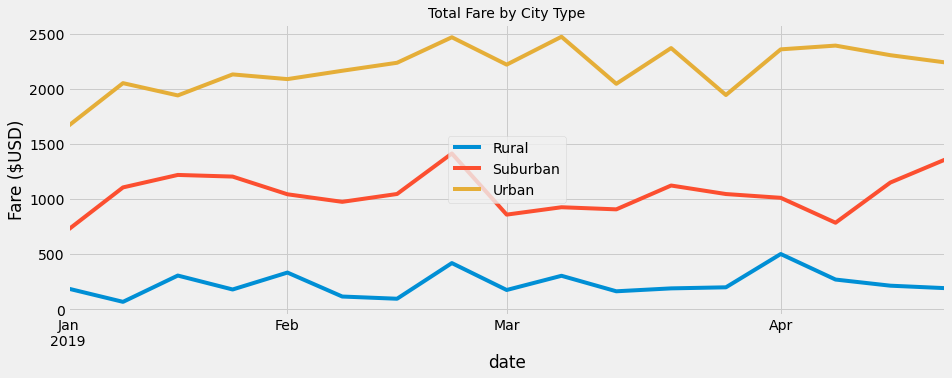

In [475]:
# 16. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.


#df.plot(kind='line', x='date', y='type', label = 'Total Fare by City Type')
fare_sum_week_df.plot(figsize=(14,5))
plt.title('Total Fare by City Type', fontsize=14)
plt.ylabel('Fare ($USD)')
lgnd = plt.legend(mode="Expanded", loc="center")
style.use('fivethirtyeight')
plt.savefig("analysis/PyBer_fare_summary.png")

